# <div align='center'> 协方差矩阵 </div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

import seaborn as sns
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 6)

# 基础

## np.cov

def cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None,aweights=None)

- m: 默认每一列代表一个观测点, 行代表属性特征, 由rowvar控制

- rowvar: 默认True, 表示行是变量(属性特征)

- bias: 默认Flase, N - 1. 这就是为啥np.var()的值和np.var对角线上的值不同的元凶.


协方差矩阵计算的是不同维度之间的协方差，而不是不同样本之间的

拿到一个样本矩阵，首先要明确的就是行代表什么，列代表什么

## np.cov(X) 和 np.cov(X, Y)区别

In [2]:
X = np.array([[1 ,5 ,6] ,[4 ,3 ,9 ],[ 4 ,2 ,9],[ 4 ,7 ,2]])
X
# 默认: 行是特征值, 列是观测值

array([[1, 5, 6],
       [4, 3, 9],
       [4, 2, 9],
       [4, 7, 2]])

In [3]:
x = X[0:2]
y = X[2:4]

In [4]:
np.cov(x, y)

array([[ 7.        ,  4.5       ,  4.        , -0.5       ],
       [ 4.5       , 10.33333333, 11.5       , -7.16666667],
       [ 4.        , 11.5       , 13.        , -8.5       ],
       [-0.5       , -7.16666667, -8.5       ,  6.33333333]])

In [5]:
np.cov(np.vstack((x, y)))

array([[ 7.        ,  4.5       ,  4.        , -0.5       ],
       [ 4.5       , 10.33333333, 11.5       , -7.16666667],
       [ 4.        , 11.5       , 13.        , -8.5       ],
       [-0.5       , -7.16666667, -8.5       ,  6.33333333]])

In [6]:
# X = np.vstack((x,y))
np.cov(X)

array([[ 7.        ,  4.5       ,  4.        , -0.5       ],
       [ 4.5       , 10.33333333, 11.5       , -7.16666667],
       [ 4.        , 11.5       , 13.        , -8.5       ],
       [-0.5       , -7.16666667, -8.5       ,  6.33333333]])

In [7]:
np.sum(np.power(X[0] - np.mean(X[0]), 2)) / (3 - 1)

(X[0] - np.mean(X[0])).T

array([-3.,  1.,  2.])

## 实现

In [8]:
def cov_matrix(X, bias=False):
    # R是属性特征, C是观测点
    R, C = X.shape
    if bias:
        dof = C
    else:
        dof = C - 1
    cov_matrix_result = np.zeros(R*C).reshape(R, C)
    for r in range(0, R):
        for c in range(0, C):
            cov_matrix_result[r][c] = np.sum((X[r] - np.average(X[r])) * (X[c] - np.average(X[c]))) / dof
    return cov_matrix_result 

In [9]:
cov_matrix(X)

array([[ 7.        ,  4.5       ,  4.        ],
       [ 4.5       , 10.33333333, 11.5       ],
       [ 4.        , 11.5       , 13.        ],
       [-0.5       , -7.16666667, -8.5       ]])

# 残差协方差矩阵

In [10]:
# 模拟数据, x[1,3,5,7,9] 5个值的150观测点, 一个X下10个样本点

# np.random.seed(520)
# x = np.random.uniform(0, 10, 30)

x = np.zeros(5 * 10)
x[0:10] = 1
x[10:20] = 3
x[20:30] = 5
x[30:40] = 7
x[40:50] = 9

e1 = np.random.randn(50)
y1 = 2*x + e1

e2 = e1*(x + 5)
y2 = 2*x + e2

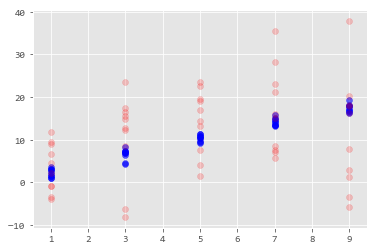

In [11]:
# sns.regplot(x, y1, color='b')
# sns.regplot(x, y2, color='r')

plt.scatter(x, y1, color='b', alpha=0.6)
plt.scatter(x, y2, color='r', alpha=0.2)

In [12]:
homo_fitted_result = sm.OLS(endog=y1, exog=x).fit()
hetero_fitted_result = sm.OLS(endog=y2, exog=x).fit()

Text(0.5,1,'Residuals vs. Fits Plot')

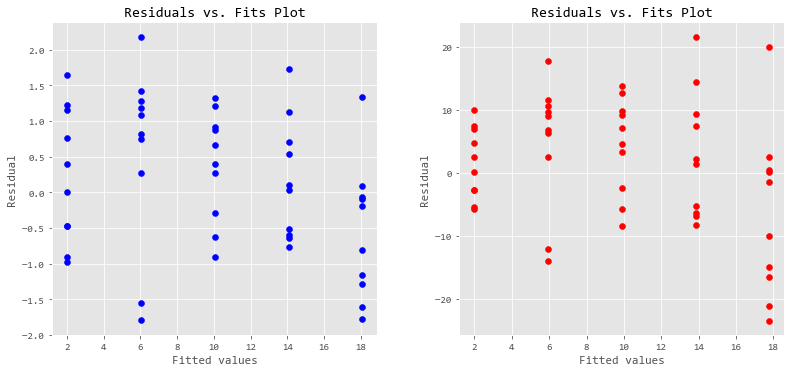

In [13]:
# 估计值
homo_x = homo_fitted_result.fittedvalues 
hetero_x = hetero_fitted_result.fittedvalues 

# 残差值
homo_e = homo_fitted_result.resid
hetero_e = hetero_fitted_result.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=5)

axes[0].scatter(homo_x, homo_e, color='b')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residual")
axes[0].set_title("Residuals vs. Fits Plot")

axes[1].scatter(hetero_x, hetero_e, color='r')
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residuals vs. Fits Plot")


In [14]:
homo_nd = homo_e.reshape(5, 10)
homo_df = pd.DataFrame(homo_nd) 
homo_mean = homo_df.apply(np.mean, axis=1)
homo_var = homo_df.apply(np.var, axis=1)

hetero_nd = hetero_e.reshape(5, 10)
hetero_df = pd.DataFrame(hetero_nd) 
hetero_mean = hetero_df.apply(np.mean, axis=1)
hetero_var = hetero_df.apply(np.var, axis=1)

print("表1")
pd.DataFrame(
    data=np.vstack((homo_mean, homo_var, hetero_mean, hetero_var)).T,
    index=["x=1", "x=3", "x=5", "x=7", "x=9"],
    columns=["均值(homo)", "方差(homo)", "均值(hetero)", "方差(hetero)"])

表1


,均值(homo),方差(homo),均值(hetero),方差(hetero)
x=1,0.234120,0.795501,1.481288,28.638050
x=3,0.562194,1.467287,4.780266,93.906343
x=5,0.381242,0.531841,4.371954,53.184129
x=7,0.170099,0.637128,2.948230,91.746470
x=9,-0.557512,0.810359,-6.479940,158.830340


如果拟合模型接近总体模型, 残差的均值应该为0, 方差相同.

因为模拟数据中, 将误差故意随着X的变化, 拟合后均值接近0, 但是方差明显递增, 那么这种情况是不直接使用OLS.

In [15]:
# 同方差情景: 协方差
print("表2")
pd.DataFrame(np.cov(homo_nd, rowvar=True, bias=True),
            index=["x=1", "x=3", "x=5", "x=7", "x=9"],
            columns=["x=1", "x=3", "x=5", "x=7", "x=9"])

表2


,x=1,x=3,x=5,x=7,x=9
x=1,0.795501,0.030915,0.226428,-0.447775,0.059800
x=3,0.030915,1.467287,0.654936,0.107649,0.399611
x=5,0.226428,0.654936,0.531841,-0.119510,0.099588
x=7,-0.447775,0.107649,-0.119510,0.637128,0.068148
x=9,0.059800,0.399611,0.099588,0.068148,0.810359


In [16]:
# 同方差情景: 相关系数
print("表3")
pd.DataFrame(np.corrcoef(homo_nd, rowvar=True, bias=True),
            index=["x=1", "x=3", "x=5", "x=7", "x=9"],
            columns=["x=1", "x=3", "x=5", "x=7", "x=9"])

表3


,x=1,x=3,x=5,x=7,x=9
x=1,1.000000,0.028615,0.348112,-0.628964,0.074481
x=3,0.028615,1.000000,0.741396,0.111336,0.366472
x=5,0.348112,0.741396,1.000000,-0.205306,0.151697
x=7,-0.628964,0.111336,-0.205306,1.000000,0.094842
x=9,0.074481,0.366472,0.151697,0.094842,1.000000


In [17]:
# 异方差情景: 协方差
print("表4")
pd.DataFrame(np.cov(hetero_nd, rowvar=True, bias=True),
            index=["x=1", "x=3", "x=5", "x=7", "x=9"],
            columns=["x=1", "x=3", "x=5", "x=7", "x=9"])

表4


,x=1,x=3,x=5,x=7,x=9
x=1,28.638050,1.483913,13.585688,-32.239803,5.023214
x=3,1.483913,93.906343,52.394847,10.334264,44.756439
x=5,13.585688,52.394847,53.184129,-14.341250,13.942340
x=7,-32.239803,10.334264,-14.341250,91.746470,11.448874
x=9,5.023214,44.756439,13.942340,11.448874,158.830340


In [18]:
# 异方差情景: 相关系数
print("表5")
pd.DataFrame(np.corrcoef(hetero_nd, rowvar=True, bias=True),
            index=["x=1", "x=3", "x=5", "x=7", "x=9"],
            columns=["x=1", "x=3", "x=5", "x=7", "x=9"])

表5


,x=1,x=3,x=5,x=7,x=9
x=1,1.000000,0.028615,0.348112,-0.628964,0.074481
x=3,0.028615,1.000000,0.741396,0.111336,0.366472
x=5,0.348112,0.741396,1.000000,-0.205306,0.151697
x=7,-0.628964,0.111336,-0.205306,1.000000,0.094842
x=9,0.074481,0.366472,0.151697,0.094842,1.000000


由上面的表可以看到, 对角线上的数据就是X在个点的样本残差的方差.

除主对角线, 其他值基本都在0附近.

对比同方差和异方差两种场景, 得到如下结论:

1. 表2, 主对角线数值基本相等; 表4, 主对角线递增; 两个表的主对角线均和表1里面的数值有对应关系

2. 表3,表5是相关系数表, 可以看出5组样本采集的数据是非线性相关.

3. 表2和表4也是特殊的残差的协方差矩, 特殊在我X取5个点, 设定X后, 再抽出10个样本, 真实场景X的值不是如此设定的.

## 显示统计信息

In [19]:
print(homo_fitted_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6400.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           1.36e-53
Time:                        18:16:58   Log-Likelihood:                -71.433
No. Observations:                  50   AIC:                             144.9
Df Residuals:                      49   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0088      0.025     79.998      0.0

------

In [20]:
print(hetero_fitted_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     60.60
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           4.08e-10
Time:                        18:16:58   Log-Likelihood:                -187.11
No. Observations:                  50   AIC:                             376.2
Df Residuals:                      49   BIC:                             378.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9764      0.254      7.785      0.0

 ---------------
 
 异方差的$R^2$远小于同方差的$R^2$

In [21]:
homo_fitted_result = sm.WLS(endog=y1, exog=x).fit()
hetero_fitted_result = sm.WLS(endog=y2, exog=x).fit()

Text(0.5,1,'Residuals vs. Fits Plot')

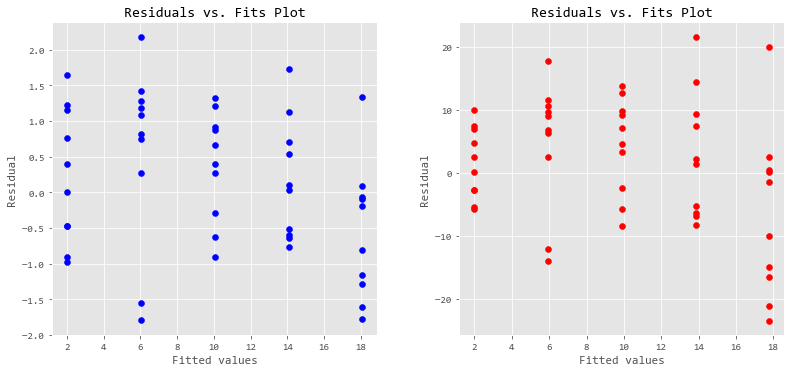

In [22]:
# 估计值
homo_x = homo_fitted_result.fittedvalues 
hetero_x = hetero_fitted_result.fittedvalues 

# 残差值
homo_e = homo_fitted_result.resid
hetero_e = hetero_fitted_result.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=5)

axes[0].scatter(homo_x, homo_e, color='b')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residual")
axes[0].set_title("Residuals vs. Fits Plot")

axes[1].scatter(hetero_x, hetero_e, color='r')
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residual")
axes[1].set_title("Residuals vs. Fits Plot")


In [23]:
homo_nd = homo_e.reshape(5, 10)
homo_df = pd.DataFrame(homo_nd) 
homo_mean = homo_df.apply(np.mean, axis=1)
homo_var = homo_df.apply(np.var, axis=1)

hetero_nd = hetero_e.reshape(5, 10)
hetero_df = pd.DataFrame(hetero_nd) 
hetero_mean = hetero_df.apply(np.mean, axis=1)
hetero_var = hetero_df.apply(np.var, axis=1)

print("表1")
pd.DataFrame(
    data=np.column_stack((homo_mean, homo_var, hetero_mean, hetero_var)),
    index=["x=1", "x=3", "x=5", "x=7", "x=9"],
    columns=["均值(homo)", "方差(homo)", "均值(hetero)", "方差(hetero)"])

表1


,均值(homo),方差(homo),均值(hetero),方差(hetero)
x=1,0.234120,0.795501,1.481288,28.638050
x=3,0.562194,1.467287,4.780266,93.906343
x=5,0.381242,0.531841,4.371954,53.184129
x=7,0.170099,0.637128,2.948230,91.746470
x=9,-0.557512,0.810359,-6.479940,158.830340
